In [1]:
import numpy as np
import pandas as pd 
import math
from collections import Counter
import statistics
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
So = 100
r = 0.04
sig = 0.3
T = 1
m = 4
io = 2
step = T/m
c = 0.01
io_step = io*step
k = 55


In [3]:
#Function to generate the value of a Autocallable-reversible convertible contract 
def acrc(c):
    n = 100000                  # No. of Simulations  
    payoff = [0]*n              #Intilize Payoff                                                                                  
    ci = c * step *So           #coupon adjusted for payment frequency 
    for sim in range(0,n):      
        St = [So]*(m+1)         #Initilize Stock price array
        loc = 1                 #Location index for stock price

        #Intilize indicators 
        exercise_date_tao = T
        Ind_tao_less_than_T = 0
        Ind_curr_less_equal_to_tao = 1
        Ind_St_less_equal_k = 1 if So<=k else 0
        Ind_tao_greater_T = 0
        flag = 0                #Variables to check if call has been exercised

        for i in np.arange(step,T+step,step):

            #Simulate stock price; St is a geometric brownian motion
            z = np.random.normal(0,1) 
            St[loc] = St[loc-1] * math.exp(((r-(sig**2)/2)*(step)) + (math.sqrt(step)*sig*z))
            
            #check indicators
            if i >io_step and St[loc]>So and i <T:
                exercise_date_tao = i
                Ind_tao_less_than_T = 1
                flag = 1 
            if St[loc] > k:
                Ind_St_less_equal_k = 0 
            else:
                Ind_St_less_equal_k = 1 
            if i == T:
                Ind_tao_greater_T = 1

            #discount factor 
            disc_fac = math.exp(-r*i)

            #payoff 
            payoff[sim] = payoff[sim] + (ci*disc_fac*Ind_curr_less_equal_to_tao) + (disc_fac * So * Ind_tao_less_than_T) + (disc_fac * Ind_tao_greater_T*((St[loc]*Ind_St_less_equal_k)+(So * (1-Ind_St_less_equal_k))))

            # print(i, (c*disc_fac*Ind_curr_less_equal_to_tao),(disc_fac * So * Ind_tao_less_than_T),(disc_fac * (Ind_tao_greater_T)*((St[loc]*Ind_St_less_equal_k)+(So * (1-Ind_St_less_equal_k))))) #Debug

            loc = loc + 1       #Update location for each time period 
            if flag == 1:       #Option has been called hence stop the loop 
                Ind_curr_less_equal_to_tao = 0
                break
    v = np.mean(payoff)            
    return v
            




In [5]:
print(acrc(0.0408))

98.87951417149881


In [5]:
# c = np.arange(0,0.2,0.001)
# v = [0]*200
# for i in range(0,200):
#     v[i]=acrc(c[i])

# plt.plot(c,v)
# plt.show()

In [6]:
# c = np.arange(0.150,0.3,0.001)
# v = [0]*150
# for i in range(0,150):
#     v[i]=acrc(c[i])

# plt.plot(c,v)
# plt.show()

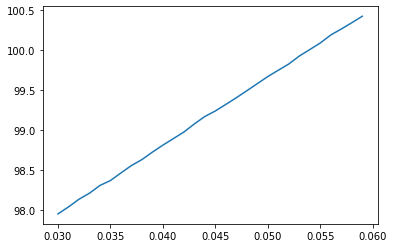

In [7]:
# start = 0.03
# stop = 0.06
# step_size = 0.001
# c = np.arange(start,stop,step_size)
# no_of_steps = int((stop-start)/step_size)
# v = [0]*no_of_steps
# for i in range(0,no_of_steps):
#     v[i]=acrc(c[i])

# plt.plot(c,v)
# plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

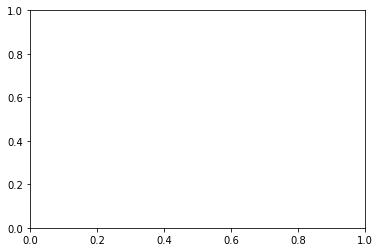

In [7]:
start = 0.05
stop = 0.06
step_size = 0.001
c = np.arange(start,stop,step_size)
no_of_steps = int((stop-start)/step_size)
v = [0]*no_of_steps
for i in range(0,no_of_steps):
    v[i]=acrc(c[i])

plt.plot(c,v)
plt.show()

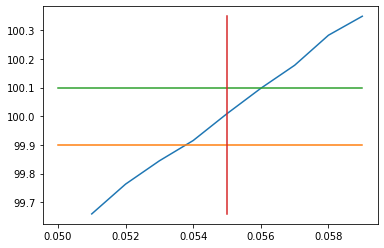

In [10]:
plt.plot(c[1:],v)
plt.plot(c,[99.9]*len(c))
plt.plot(c,[100.1]*len(c))
plt.plot([0.055]*len(v),v)
plt.show()

5.5